In [1]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
from __future__ import print_function
import random
random.seed(2010)

import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import backend as K


/home/ec2-user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
inv_f = lambda x : MC.inverse_uniform(x,0,1000)
X = MC.RandomVariable(inv_f,"uniform distribution from x=1:5")
sample_ratio  = .5

def two_linear_functions(x,slope1,slope2,intercept1,intercept2,std_dev1=1,std_dev2=1):
    coin_toss = (random.random() > sample_ratio)
    if coin_toss:
        return (MC.Linear_GaussianNoise(x,slope1,intercept1,std_dev1))
    else:
        return (MC.Linear_GaussianNoise(x,slope2,intercept2,std_dev2))
cost_f = lambda x : (x,two_linear_functions(x,1,0,0,0,2,2))
generate_toy_data = MC.Simulator(X,cost_f,'generator for two linear functions from x=1:5', verbose = True)

for y in generate_toy_data.sample_repeated(10):
    print (y)

testing random variable with distribution uniform distribution from x=1:5,
 139

New simulator for generator for two linear functions from x=1:5,
 with uniform distribution from x=1:5 input
(486.6525117612371, 1.3605170208514599)
(546.662624463851, -0.4880827414725975)
(973.4140484418796, 3.564489869245994)
(878.1434984088488, -0.820472550350055)
(755.8576184813135, -2.038917852764624)
(605.2944401934303, -0.46354574320435893)
(496.1507553335034, 491.3894525519613)
(495.99104578343145, 494.1476863786821)
(223.13309886940226, -2.373586384390689)
(648.9468843408174, -0.2856589624674007)


In [5]:
#################################
#######Construct Network#########
#################################


# Define sudoMin loss function


# Convolutional layers

# Example from Keras github


batch_size = 128
no_predictions = 2
epochs = 500

def customLoss(yTrue,yPred):
    return K.sum(K.min(K.square(yTrue-yPred),axis = 1))



sample_ratio = .5
TrainData = list(generate_toy_data.sample_repeated(400))
x_train, y_train  = zip(*TrainData)
TestData = list(generate_toy_data.sample_repeated(300))
x_test, y_test  = zip(*TestData)
x_train = np.array(x_train,ndmin = 2).T
y_train = np.array(y_train,ndmin = 2).T
x_test = np.array(x_test,ndmin = 2).T
y_test = np.array(y_test,ndmin = 2).T
# the data, split between train and test sets

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices


model = Sequential()
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros',
                input_shape=[1]))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(no_predictions, activation='linear'))

model.compile(loss=customLoss,
              optimizer=keras.optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])



x_train shape: (400, 1)
400 train samples
300 test samples
Test loss: 13745.499319661458


Text(0.5,1,'Multimodal Output, Toy Results')

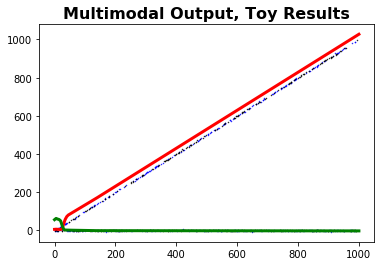

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(0, 1000, 200)
Y1,Y2 = zip(*model.predict(X))


plt.plot(X,Y1, 'r-',linewidth = 3)
plt.plot(X,Y2, 'g-',linewidth = 3)
plt.scatter(x_train, y_train,s = .2, c='blue')
plt.scatter(x_test, y_test, s = .2 ,c='black')
#plt.ylim(0,300)
# Add title and x, y labels
plt.title("Multimodal Output, Toy Results", fontsize=16, fontweight='bold')


In [7]:
#Visualize Nodes
def customLoss(yTrue,yPred):
    t = K.variable(yTrue)
    p = K.variable(yPred)
    print(yTrue)
    print(yPred)
    print(K.eval(K.square(t)))
    print(K.eval(K.square(p)))
    print(K.eval(K.square(t-p)))
    
    X = K.square(t-p)
    X= K.min(K.square(t-p),axis= 1)
    return K.eval(X)
print(customLoss(np.array([[1],[2]]),np.array([[1,2,3],[4,5,6]])))




[[1]
 [2]]
[[1 2 3]
 [4 5 6]]
[[1.]
 [4.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[ 0.  1.  4.]
 [ 4.  9. 16.]]
[0. 4.]


In [41]:
Y1

(5.730152,
 5.820733,
 5.911314,
 6.001893,
 6.092471,
 5.972663,
 5.7933197,
 5.6139727,
 5.4346256,
 5.2552767,
 5.0849266,
 4.915699,
 4.7464714,
 4.5772448,
 4.3767624,
 4.0953045,
 3.6048887,
 3.114467,
 2.6240528,
 2.154956,
 1.7803876,
 1.4058192,
 1.0736728,
 0.8080776,
 0.54247975,
 0.40823627,
 0.40424895,
 0.40026522,
 0.39628148,
 0.39229608,
 0.38831186,
 0.38432622,
 0.38034272,
 0.37635732,
 0.37237096,
 0.36838603,
 0.36440206,
 0.36041665,
 0.35643172,
 0.3524468,
 0.34846282,
 0.3444736,
 0.3404925,
 0.33650565,
 0.33252263,
 0.32853723,
 0.3245504,
 0.32056642,
 0.3165815,
 0.31259608,
 0.3086102,
 0.30462432,
 0.3006451,
 0.29665637,
 0.2926724,
 0.2886865,
 0.2847016,
 0.28071713,
 0.27672887,
 0.27274632,
 0.26876283,
 0.2647755,
 0.2607882,
 0.25680852,
 0.2528193,
 0.24883866,
 0.24485326,
 0.24086499,
 0.2368834,
 0.23289895,
 0.22891068,
 0.22493196,
 0.22094178,
 0.21695828,
 0.21297097,
 0.20898747,
 0.20500112,
 0.20101953,
 0.19703412,
 0.19304585,
 0.1890